In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
csv_files =['student-mat.csv','student-por.csv']
df = pd.DataFrame()
for file in csv_files:
    data = pd.read_csv(file)
    df =pd.concat([df,data], axis=0)
df.to_csv('merged_files.csv',index=False)

In [17]:
#merged the two files
df1=pd.DataFrame()
df1=pd.read_csv('merged_files.csv')
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [18]:
#checking for dupliacte values
duplicate = df1[df1.duplicated()]
duplicate


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [19]:
#Initial Data exploration
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
df1.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [21]:
#checking data types
df1.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [23]:
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [24]:
#label_encoder = LabelEncoder()
#df1["activities"] = label_encoder.fit_transform(df1["activities"])
#df1["internet"] = label_encoder.fit_transform(df1["internet"])
#df1["Pstatus"] = label_encoder.fit_transform(df1["Pstatus"])

In [25]:
df1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [26]:
df1.index

RangeIndex(start=0, stop=1044, step=1)

#Research Question 1: What is the relationship between alcohol consumption patterns, 
#including frequency and quantity, and academic achievement among college students, 
#and how do these patterns vary across different demographic groups?

In [27]:
#Weekday Alcohol consumption
wday_alc = pd.DataFrame(df1.groupby(['Dalc'])['Dalc'].count())
wday_alc

,Dalc
Dalc,
1,727
2,196
3,69
4,26
5,26


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

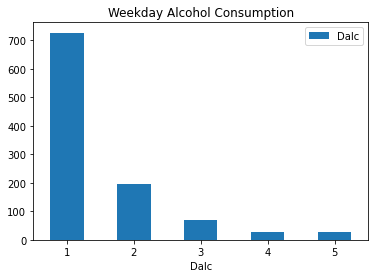

In [28]:
#The below graph shows that the number of students consuming alcohol is low on weekdays 


wday_alc.plot(y ='Dalc', kind='bar',title='Weekday Alcohol Consumption', use_index=True)
plt.xticks(rotation=360)

<AxesSubplot:title={'center':'Weekday Alcohol Consumption'}, ylabel='Dalc'>

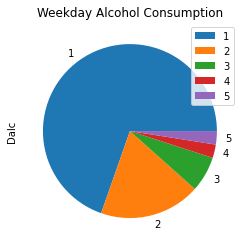

In [29]:
#pie chart representation of the same
wday_alc.plot(y='Dalc',kind='pie',title='Weekday Alcohol Consumption', use_index=True)


In [30]:
#Weekend Alcohol Consumption
wend_alc = pd.DataFrame(df1.groupby(['Walc'])['Walc'].count())
wend_alc

,Walc
Walc,
1,398
2,235
3,200
4,138
5,73


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

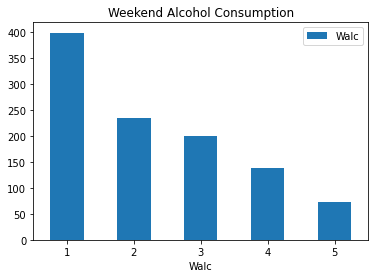

In [31]:
#the below graph shows that there are more students consuming alcohol 
#is moderate quantity on weekends

wend_alc.plot(y ='Walc', kind='bar',title='Weekend Alcohol Consumption', use_index=True)
plt.xticks(rotation=360)

<AxesSubplot:title={'center':'Weekend Alcohol Consumption'}, ylabel='Walc'>

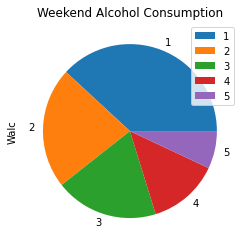

In [32]:
#pie chart depiction of the same
wend_alc.plot(y='Walc',kind='pie',title='Weekend Alcohol Consumption', use_index=True)

In [33]:
#Weekday VS Weekend Alcohol Consumption
result= pd.concat([wday_alc,wend_alc],axis=1)
result.rename(columns={'Dalc':'Weekday','Walc':'Weekend'},inplace=True)
result

,Weekday,Weekend
1,727,398
2,196,235
3,69,200
4,26,138
5,26,73


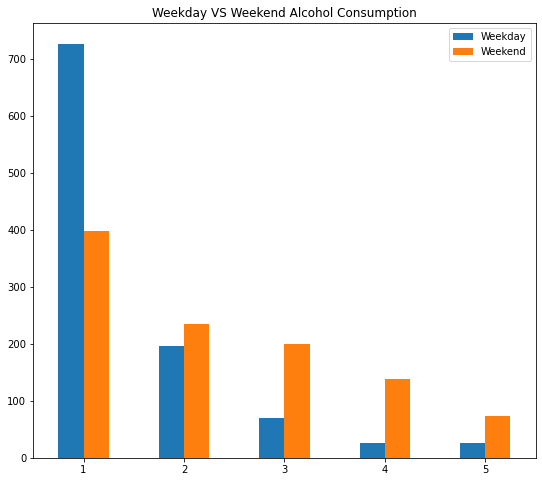

In [34]:
#It can be inferred from the below graphical comparison that the intensity of alcohol consumption 
#is high among students on weekends as compared to weekdays.

fig=result.plot(y=["Weekday", "Weekend"], kind="bar",
                title = "Weekday VS Weekend Alcohol Consumption", figsize=(9, 8))
plt.xticks(rotation=360)


# print bar graph
plt.show()

In [35]:
#Weekend and weekday alcohol consumption with 3 or higher intensity
DW = df1[(df1.Dalc >=3) & (df1.Walc >= 3)]
DW

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4,4,5,5,5,5,16,10,12,11
30,GP,M,15,U,GT3,T,4,4,health,services,...,5,4,2,3,4,5,0,9,11,12
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,5,5,3,4,5,6,11,11,10
54,GP,F,15,U,LE3,A,3,3,other,other,...,5,3,4,4,4,1,6,10,13,13
61,GP,F,16,U,GT3,T,1,1,services,services,...,5,5,5,5,5,5,6,10,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,MS,M,17,R,GT3,T,1,1,other,services,...,4,2,3,3,4,4,4,12,13,14
1028,MS,F,18,R,LE3,T,4,4,teacher,services,...,5,4,3,3,4,2,1,13,14,14
1035,MS,M,18,R,GT3,T,4,2,other,other,...,5,4,3,4,3,3,0,7,7,0
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [36]:
#How many students are from rural and Urban who consume more alcohol?
RU = pd.DataFrame(DW.groupby(['address'])['address'].count())
RU

,address
address,
R,41
U,72


In [37]:
#In each geographic entities group by age

RU = pd.DataFrame(DW.groupby(['address','age'])['age'].count())
RU.rename(columns={'age':'Count'},inplace=True)
RU

Count
address age       
R       15       4
        16       8
        17      10
        18      13
        19       5
        21       1
U       15       9
        16      16
        17      24
        18      13
        19       7
        20       1
        22       2

In [38]:
#Splitting the dataframe into 2
df2 = RU.iloc[:6,:]
df3 = RU.iloc[6:,:]

In [39]:
df2.reset_index(inplace=True)
df2.columns

Index(['address', 'age', 'Count'], dtype='object')

In [40]:
total_alc = df1.Dalc+df1.Walc
df2=df2.rename(columns={'Count':'Count_Rural'})
new_df2 = df2[['age','Count_Rural']].copy()
new_df2

,age,Count_Rural
0,15,4
1,16,8
2,17,10
3,18,13
4,19,5
5,21,1


In [41]:
df3.reset_index(inplace=True)
df3=df3.rename(columns={'Count':'Count_Urban'})
df3

,address,age,Count_Urban
0,U,15,9
1,U,16,16
2,U,17,24
3,U,18,13
4,U,19,7
5,U,20,1
6,U,22,2


<AxesSubplot:xlabel='Dalc', ylabel='G1'>

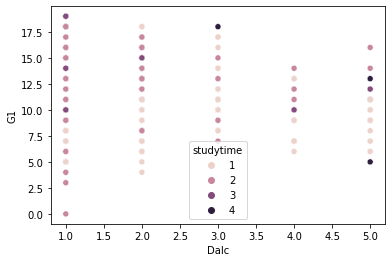

In [42]:

sns.scatterplot(x=df1['Dalc'],y=df1['G1'], hue=df1['studytime'])

In [43]:
new_df3 = df3[['age','Count_Urban']].copy()
new_df3

,age,Count_Urban
0,15,9
1,16,16
2,17,24
3,18,13
4,19,7
5,20,1
6,22,2


In [44]:
result = pd.merge(new_df2, new_df3, on = 'age')
result

,age,Count_Rural,Count_Urban
0,15,4,9
1,16,8,16
2,17,10,24
3,18,13,13
4,19,5,7


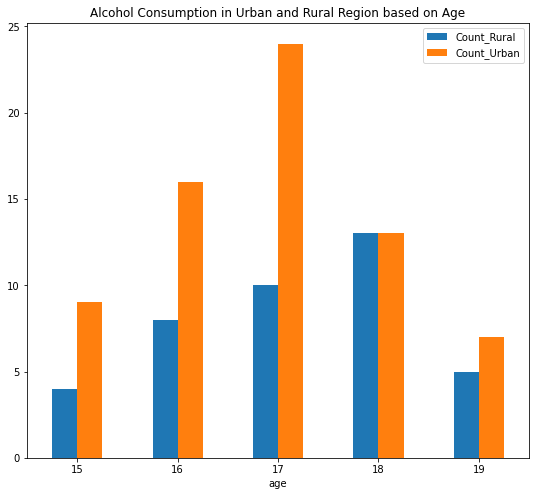

In [45]:
#the below graph shows that urban students are consuming more alcohol as comapred to Rural students.
#we can also infer that students aged 16 and 17 consume more alcohol among the age group 15-19.

fig=result.plot(x='age',y=["Count_Rural", "Count_Urban"], kind="bar",
                title = "Alcohol Consumption in Urban and Rural Region based on Age", figsize=(9, 8))
plt.xticks(rotation=360)


# print bar graph
plt.show()

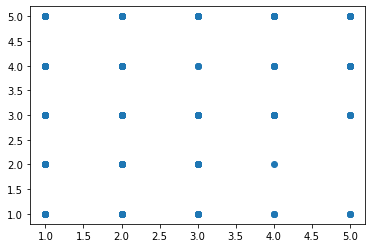

In [46]:
#scatter plot of 
plt.scatter(df1['Dalc'],df1['health'])
#plt.scatter(df1['Walc'],df1['failures'])

In [47]:
#Total alcohol consumption

df4 = pd.DataFrame()
df4['Total_alc'] = df1['Dalc']+df1['Walc']
df4['Grade'] = df1['G1']+df1['G2']+df1['G3']
df4

,Total_alc,Grade
0,2,17
1,2,16
2,5,25
3,2,44
4,3,26
...,...,...
1039,3,31
1040,2,46
1041,2,32
1042,7,30


In [48]:
df1['activities'] = df1['activities'].replace(['no','yes'], [0,1])
corr_coef = np.corrcoef(df1['health'], df1['activities'])[0, 1]


In [49]:
corr_coef

0.017165068652381307

In [50]:
total_alc = df1.Dalc+df1.Walc

In [51]:
total_alc

0       2
1       2
2       5
3       2
4       3
       ..
1039    3
1040    2
1041    2
1042    7
1043    7
Length: 1044, dtype: int64

In [52]:
total_grade = df1.G1+df1.G2+df1.G3

In [53]:
total_grade

0       17
1       16
2       25
3       44
4       26
        ..
1039    31
1040    46
1041    32
1042    30
1043    32
Length: 1044, dtype: int64

In [54]:
df1['Total_Alc'] = total_alc
df1['Total_Grade'] = total_grade

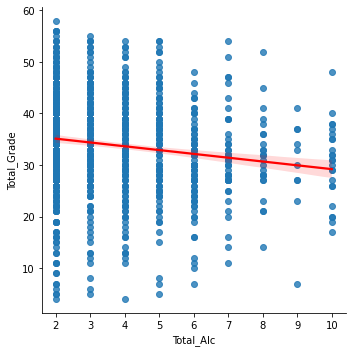

In [55]:
sns.lmplot(x='Total_Alc', y='Total_Grade', data=df1, line_kws={'color': 'red'})

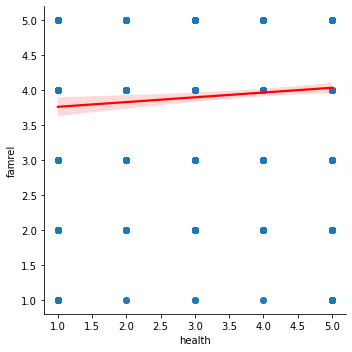

In [62]:
#it can be inferred that quality of family relationship has 
#direct impact on the student's mental health

sns.lmplot(x='health', y='famrel', data=df1, line_kws={'color': 'red'})

In [57]:
#correlation matrix showing the relationship between other fields.
corr_matrix = df1.corr()

# Print the correlation matrix
print(corr_matrix)

                  age      Medu      Fedu  traveltime  studytime  failures  \
age          1.000000 -0.130196 -0.138521    0.049216  -0.007870  0.282364   
Medu        -0.130196  1.000000  0.642063   -0.238181   0.090616 -0.187769   
Fedu        -0.138521  0.642063  1.000000   -0.196328   0.033458 -0.191390   
traveltime   0.049216 -0.238181 -0.196328    1.000000  -0.081328  0.087177   
studytime   -0.007870  0.090616  0.033458   -0.081328   1.000000 -0.152024   
failures     0.282364 -0.187769 -0.191390    0.087177  -0.152024  1.000000   
activities  -0.073648  0.116924  0.093800   -0.025834   0.078847 -0.027500   
famrel       0.007162  0.015004  0.013066   -0.012578   0.012324 -0.053676   
freetime     0.002645  0.001054  0.002142   -0.007403  -0.094429  0.102679   
goout        0.118510  0.025614  0.030075    0.049740  -0.072941  0.074683   
Dalc         0.133453  0.001515 -0.000165    0.109423  -0.159665  0.116336   
Walc         0.098291 -0.029331  0.019524    0.084292  -0.229073

<AxesSubplot:>

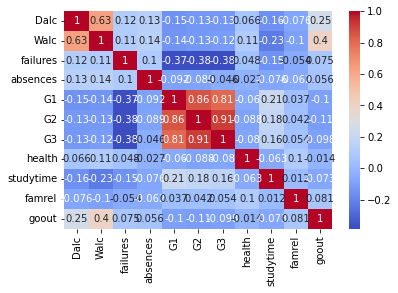

In [60]:
#Multivariate Correlation
columns = ['Dalc','Walc' ,'failures', 'absences', 'G1', 'G2', 'G3','health','studytime','famrel','goout']

# Create a new dataframe with only the selected columns
df_selected = df1[columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [59]:
#References
#heatmap explanation
#https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/